In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

# Playing Card Recognition

In [2]:
#create a train dataframe
labels_train = []
images_train = []

path_train = "D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\data\\train"
dir_list_train = os.listdir(path_train)

for lab in dir_list_train:
    #temp image list for each label
    img_list = os.listdir(path_train + "\\" + lab)
    for img in img_list:
        labels_train.append(lab)
        images_train.append(path_train + "\\" + lab + "\\" + img)

df_train = pd.DataFrame({"label":labels_train, "image":images_train})

df_train

,label,image
0,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
1,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
2,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
3,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
4,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
...,...,...
7619,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
7620,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
7621,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
7622,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...


In [3]:
#create a test dataframe
labels_test = []
images_test = []

path_test = "D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\data\\test"
dir_list_test = os.listdir(path_test)

for lab in dir_list_test:
    #temp image list for each label
    img_list = os.listdir(path_test + "\\" + lab)
    for img in img_list:
        labels_test.append(lab)
        images_test.append(path_test + "\\" + lab + "\\" + img)

df_test = pd.DataFrame({"label":labels_test, "image":images_test})

df_test

,label,image
0,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
1,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
2,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
3,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
4,ace of clubs,D:\Coding\DataScience\DataPlayground\PlayingCa...
...,...,...
260,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
261,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
262,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...
263,two of spades,D:\Coding\DataScience\DataPlayground\PlayingCa...


In [4]:
#convert categorical labels to numerical labels
labels = df_train["label"].unique()

labels_nums = dict(enumerate(labels))
nums_labels = {value : key for key, value in labels_nums.items()}

df_train['label'] = df_train['label'].map(nums_labels)
df_test['label'] = df_test['label'].map(nums_labels)

In [5]:
#make labels shorter for easier use
labels_nums = {
    0: 'A C',
    1: 'A D',
    2: 'A H',
    3: 'A S',
    4: '8 C',
    5: '8 D',
    6: '8 H',
    7: '8 S',
    8: '5 C',
    9: '5 D',
    10: '5 H',
    11: '5 S',
    12: '4 C',
    13: '4 D',
    14: '4 H',
    15: '4 S',
    16: 'J C',
    17: 'J D',
    18: 'J H',
    19: 'J S',
    20: 'Joker',
    21: 'K C',
    22: 'K D',
    23: 'K H',
    24: 'K S',
    25: '9 C',
    26: '9 D',
    27: '9 H',
    28: '9 S',
    29: 'Q C',
    30: 'Q D',
    31: 'Q H',
    32: 'Q S',
    33: '7 C',
    34: '7 D',
    35: '7 H',
    36: '7 S',
    37: '6 C',
    38: '6 D',
    39: '6 H',
    40: '6 S',
    41: '10 C',
    42: '10 D',
    43: '10 H',
    44: '10 S',
    45: '3 C',
    46: '3 D',
    47: '3 H',
    48: '3 S',
    49: '2 C',
    50: '2 D',
    51: '2 H',
    52: '2 S'
}


In [68]:
df_train

,label,image
0,0,D:\Coding\DataScience\DataPlayground\PlayingCa...
1,0,D:\Coding\DataScience\DataPlayground\PlayingCa...
2,0,D:\Coding\DataScience\DataPlayground\PlayingCa...
3,0,D:\Coding\DataScience\DataPlayground\PlayingCa...
4,0,D:\Coding\DataScience\DataPlayground\PlayingCa...
...,...,...
7619,52,D:\Coding\DataScience\DataPlayground\PlayingCa...
7620,52,D:\Coding\DataScience\DataPlayground\PlayingCa...
7621,52,D:\Coding\DataScience\DataPlayground\PlayingCa...
7622,52,D:\Coding\DataScience\DataPlayground\PlayingCa...


In [69]:
#convert images to numpy arrays
def convert_to_array(img):
    img = cv2.imread(img)
    img = cv2.resize(img, (160,160))
    img = img / 255.0
    return img

#convert images to arrays
converted_train = []

for img in df_train["image"]:
    converted_train.append(convert_to_array(img))

converted_test = []

for img in df_test["image"]:
    converted_test.append(convert_to_array(img))

KeyboardInterrupt: 

In [9]:
converted_train = np.array(converted_train)

In [11]:
converted_test = np.array(converted_test)

In [10]:
converted_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.10196078, 0.10980392, 0.11372549],
         [0.10588235, 0.11372549, 0.11764706]

Text(0.5, 1.0, 'eight of hearts')

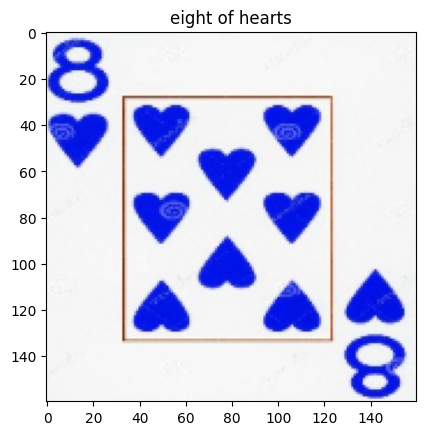

In [16]:
plt.imshow(converted_train[900])
plt.title(labels_nums[df_train["label"][900]])

## Model fitting

In [21]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(160,160,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model1.fit(converted_train, df_train["label"], epochs=10)

model1.evaluate(converted_test, df_test["label"])

Epoch 1/10
239/239 [==============================] - 324s 1s/step - loss: 2.6642 - accuracy: 0.2844
Epoch 2/10
239/239 [==============================] - 285s 1s/step - loss: 1.4633 - accuracy: 0.6036
Epoch 3/10
239/239 [==============================] - 280s 1s/step - loss: 0.9298 - accuracy: 0.7466
Epoch 4/10
239/239 [==============================] - 278s 1s/step - loss: 0.5662 - accuracy: 0.8387
Epoch 5/10
239/239 [==============================] - 281s 1s/step - loss: 0.3332 - accuracy: 0.9125
Epoch 6/10
239/239 [==============================] - 279s 1s/step - loss: 0.2028 - accuracy: 0.9506
Epoch 7/10
239/239 [==============================] - 291s 1s/step - loss: 0.1143 - accuracy: 0.9742
Epoch 8/10
239/239 [==============================] - 278s 1s/step - loss: 0.1091 - accuracy: 0.9761
Epoch 9/10
239/239 [==============================] - 278s 1s/step - loss: 0.0852 - accuracy: 0.9794
Epoch 10/10
9/9 [==============================] - 11s 289ms/step - loss: 1.0466 - accuracy

[1.0465894937515259, 0.8301886916160583]

In [23]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(160,160,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(53, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model2.fit(converted_train, df_train["label"], epochs=10)

model2.evaluate(converted_test, df_test["label"])

Epoch 1/10
239/239 [==============================] - 304s 1s/step - loss: 2.6393 - accuracy: 0.2988
Epoch 2/10
239/239 [==============================] - 286s 1s/step - loss: 1.5007 - accuracy: 0.6085
Epoch 3/10
239/239 [==============================] - 283s 1s/step - loss: 0.9942 - accuracy: 0.7311
Epoch 4/10
239/239 [==============================] - 277s 1s/step - loss: 0.5981 - accuracy: 0.8324
Epoch 5/10
239/239 [==============================] - 285s 1s/step - loss: 0.3364 - accuracy: 0.9079
Epoch 6/10
239/239 [==============================] - 284s 1s/step - loss: 0.2125 - accuracy: 0.9436
Epoch 7/10
239/239 [==============================] - 282s 1s/step - loss: 0.1411 - accuracy: 0.9693
Epoch 8/10
239/239 [==============================] - 283s 1s/step - loss: 0.1105 - accuracy: 0.9747
Epoch 9/10
239/239 [==============================] - 270s 1s/step - loss: 0.0949 - accuracy: 0.9798
Epoch 10/10
9/9 [==============================] - 4s 287ms/step - loss: 1.5677 - accuracy:

[1.5677402019500732, 0.8188679218292236]

Model1 got better results, so we will fit it with test data as well.


In [25]:
model1.fit(converted_test, df_test["label"], epochs=10)

Epoch 1/10
9/9 [==============================] - 13s 1s/step - loss: 0.9041 - accuracy: 0.8264
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.2727 - accuracy: 0.9472
Epoch 3/10
9/9 [==============================] - 9s 1s/step - loss: 0.1320 - accuracy: 0.9774
Epoch 4/10
9/9 [==============================] - 9s 1s/step - loss: 0.1150 - accuracy: 0.9849
Epoch 5/10
9/9 [==============================] - 9s 1s/step - loss: 0.0368 - accuracy: 0.9925
Epoch 6/10
9/9 [==============================] - 9s 993ms/step - loss: 0.0355 - accuracy: 0.9962
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 10s 1s/step - loss: 7.2490e-04 - accuracy: 1.0000
Epoch 9/10
9/9 [==============================] - 10s 1s/step - loss: 3.5110e-04 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 12s 1s/step - loss: 2.5267e-04 - accuracy: 1.0000


In [26]:
#save model
model1.save("D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\model\model1")

INFO:tensorflow:Assets written to: D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\model\model1\assets


INFO:tensorflow:Assets written to: D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\model\model1\assets


In [6]:
#load model
model1 = tf.keras.models.load_model("D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\model\model1")

# Object Detection part

In [25]:
#predict function
def predict_image(img):
    resized = cv2.resize(img, (160,160))
    resized = resized / 255.0

    pred = model1.predict(np.array([resized]))

    max_pred = np.argmax(pred)  

    if (pred[0][max_pred] < 0.6):
        return None

    return labels_nums[max_pred] + " " + f"{(pred[0][max_pred].round(3) * 100):.1f}"


In [36]:
image = cv2.imread("D:\Coding\DataScience\DataPlayground\PlayingCardRecognition\data\\recognize\\640px-Two_cards_from_a_French_suited_pack.jpg")

edged = cv2.Canny(image, 40, 60)

cv2.imshow("Edged", edged)
cv2.waitKey(0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imshow("Closed", closed)
cv2.waitKey(0)

(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    # Ignore small contours
    if w < 50 or h < 50 :
        continue
    crop_img = image[y:y+h, x:x+w]

    pred = predict_image(crop_img)
    if pred is not None:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, pred, (x, y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
        cv2.imshow("Output",image)
        cv2.waitKey(20)

cv2.waitKey(0)




1/1 [==============================] - 0s 35ms/step


-1